# Introduction to Recommender Systems

<p align="center">
    <img width="721" alt="cover-image" src="https://user-images.githubusercontent.com/49638680/204351915-373011d3-75ac-4e21-a6df-99cd1c552f2c.png">
</p>

---

# The Exercise

In this exercise, you will implement a simple recommender system using the GoodRead dataset. The dataset contains information about books, authors, and user ratings. The goal is to recommend books to users based on their ratings.

## The Dataset

The dataset is available at this link: [GoodReads Dataset](https://github.com/zygmuntz/goodbooks-10k/releases/download/v1.0/goodbooks-10k.zip). It contains the following files:

- `books.csv`: Contains information about books.
- `ratings.csv`: Contains user ratings for books.
- `book_tags.csv`: Contains tags assigned to books.

## The Task

You need to implement a simple recommender system that recommends books to users based on their ratings.

### Steps

1. Download the dataset.
2. Perfom data analysis.
3. Justify all the choices you make as results of some data analysis.
4. Implement the recommender system.

### Tasks

While implementing the recommender system, you need to perform the following tasks (that are also a guideline for the implementation).

#### Data Analysis

- Load and explore the dataset.
- Analyse the distribution of ratings.
- Visualise the number of ratings per book and per user.
- Check for missing values and decide how to handle them.


#### Feature Engineering

- Encode User_ID and Book_Title as integer indices for the model.
- Create a feature to represent the popularity of books based on the number of ratings.
- Optionally, incorporate author information if it improves the model.

#### Building the Recommender System

- Split the data into training and test sets.
- Implement a collaborative filtering model using matrix factorization.
- Train the model and evaluate its performance using RMSE (Root Mean Square Error) on the test set.
- Generate book recommendations for a set of users.- 

#### Recommendations

- Write a function to display the top N recommended books for a given user.
- Discuss how different features and the size of the dataset affect the model's performance.

In [1]:
#path ../../../goodread/

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder

In [3]:
df_books = pd.read_csv("../../../goodread/books.csv")
df_ratings = pd.read_csv("../../../goodread/ratings.csv")
df_booktags = pd.read_csv("../../../goodread/book_tags.csv")

In [4]:
print(df_books.columns)
print("\n==========\n")
print(df_ratings.columns)
print("\n==========\n")
print(df_booktags.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


Index(['user_id', 'book_id', 'rating'], dtype='object')


Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')


# Data Analysis

In [26]:
df_books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,popularity
0,0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,NaN
1,1,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,22806.0
2,2,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,21850.0
3,3,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,16931.0
4,4,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,19088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,7855,15613,15613,2764239,199,1416523723,9.781417e+12,Herman Melville,1924.0,"Billy Budd, Sailor",...,12110,681,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,156.0
7856,7856,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,132.0
7857,7857,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,157.0
7858,7858,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,204.0


In [27]:
df_ratings

,user_id,book_id,rating
0,0,258,5
1,1,4081,4
2,1,260,5
3,1,9296,5
4,1,2318,3
...,...,...,...
5976474,49924,510,5
5976475,49924,528,4
5976476,49924,722,4
5976477,49924,949,5


In [28]:
df_booktags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


## Ratings Distribution

In [8]:
ratings_distribution = df_ratings['rating'].value_counts().sort_index()
ratings_distribution

rating
1     124195
2     359257
3    1370916
4    2139018
5    1983093
Name: count, dtype: int64

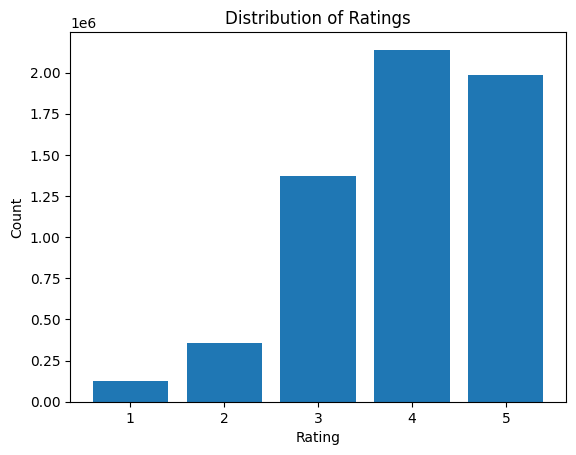

In [9]:
plt.bar(ratings_distribution.index, ratings_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(ratings_distribution.index)
plt.show()

## Visualize Ratings

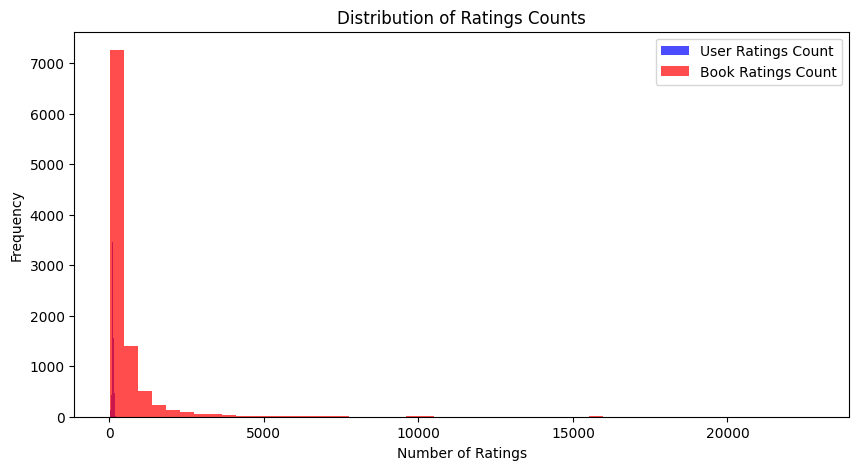

In [10]:
user_ratings_count = df_ratings['user_id'].value_counts()
book_ratings_count = df_ratings['book_id'].value_counts()

plt.figure(figsize=(10,5))
plt.hist(user_ratings_count, bins=50, alpha=0.7, color='blue', label='User Ratings Count')
plt.hist(book_ratings_count, bins=50, alpha=0.7, color='red', label='Book Ratings Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings Counts')
plt.legend()
plt.show()

In [12]:
print(df_books.isnull().sum())
print("\n==========\n")
print(df_ratings.isnull().sum())
print("\n==========\n")
print(df_booktags.isnull().sum())

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


user_id    0
book_id    0
rating     0
dtype: int64


goodreads_book_id    0
tag_id               0
count                0
dtype: int64


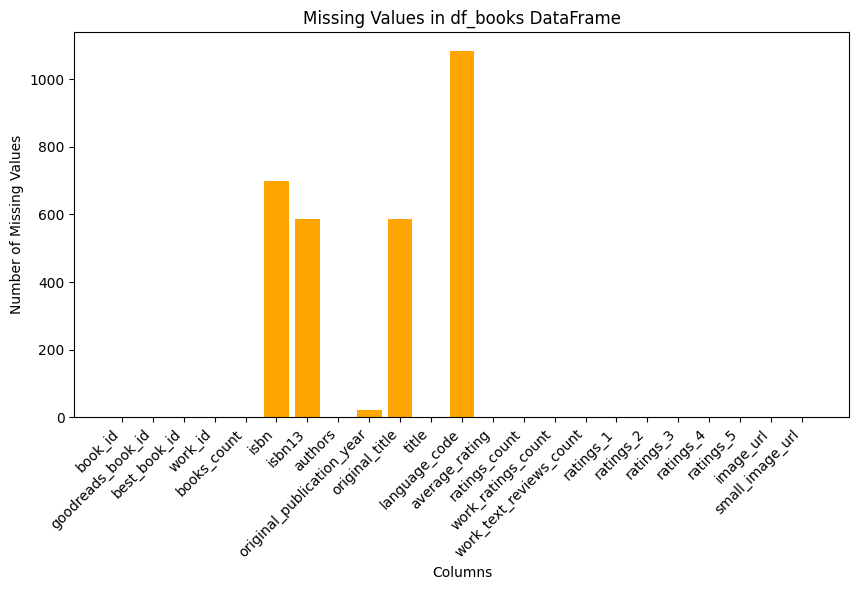

In [13]:
missing_values = df_books.isnull().sum()

plt.figure(figsize=(10, 5))
plt.bar(missing_values.index, missing_values.values, color='orange')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in df_books DataFrame')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
df_books.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_booktags.dropna(inplace=True)

# Feature Engineering

## Encoding

In [15]:
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

df_ratings['user_id'] = user_encoder.fit_transform(df_ratings['user_id'])
df_books['book_id'] = book_encoder.fit_transform(df_books['book_id'])

## Popularity

In [16]:
book_popularity = df_ratings.groupby('book_id').size().reset_index(name='popularity')
df_books = df_books.merge(book_popularity, on='book_id', how='left')

# Recommender System

In [17]:
X = df_ratings[['user_id', 'book_id']]
y = df_ratings['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
user_item_matrix = csr_matrix((y_train, (X_train['user_id'], X_train['book_id'])))

model = NMF(n_components=10, random_state=42)
model.fit(user_item_matrix)

NMF(n_components=10, random_state=42)

In [19]:
user_item_matrix_test = csr_matrix((y_test, (X_test['user_id'], X_test['book_id'])))

predictions = model.transform(user_item_matrix_test)

rmse = np.sqrt(mean_squared_error(user_item_matrix_test.toarray(), np.dot(model.transform(user_item_matrix_test), model.components_)))
print("RMSE:", rmse)

RMSE: 0.18743624461076816


In [33]:
def recommend_books(user_id, model, n_recommendations=5):
    user_idx = user_encoder.transform([user_id])[0]
    user_ratings = model.components_[user_idx]
    top_indices = np.argsort(user_ratings)[::-1][:n_recommendations]
    recommended_books = book_encoder.inverse_transform(top_indices)
    return recommended_books

def pretty_printer(recommended_books):
    i = 0
    for book in recommended_books:
        i += 1
        title = df_books[df_books['book_id'] == book]['original_title'].values[0]
        author = df_books[df_books['book_id'] == book]['authors'].values[0]
        year = df_books[df_books['book_id'] == book]['original_publication_year'].values[0]
        print(f"Book n°{i} :")
        print(title, ",", author, ",", year, "\n")

user_id = 1  # changer pour nimporte quel user.
recommended_books = recommend_books(user_id, model)
print("Recommended books for user", user_id, ":")
pretty_printer(recommended_books)

Recommended books for user 1 :
Book n°1 :
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944 , Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday , 1947.0 

Book n°2 :
Män som hatar kvinnor , Stieg Larsson, Reg Keeland , 2005.0 

Book n°3 :
Pride and Prejudice , Jane Austen , 1813.0 

Book n°4 :
Insurgent , Veronica Roth , 2012.0 

Book n°5 :
Charlotte's Web , E.B. White, Garth Williams, Rosemary Wells , 1952.0 



In [34]:
# TODO: fix user id, 1 - 10 c'est good apres ca crash